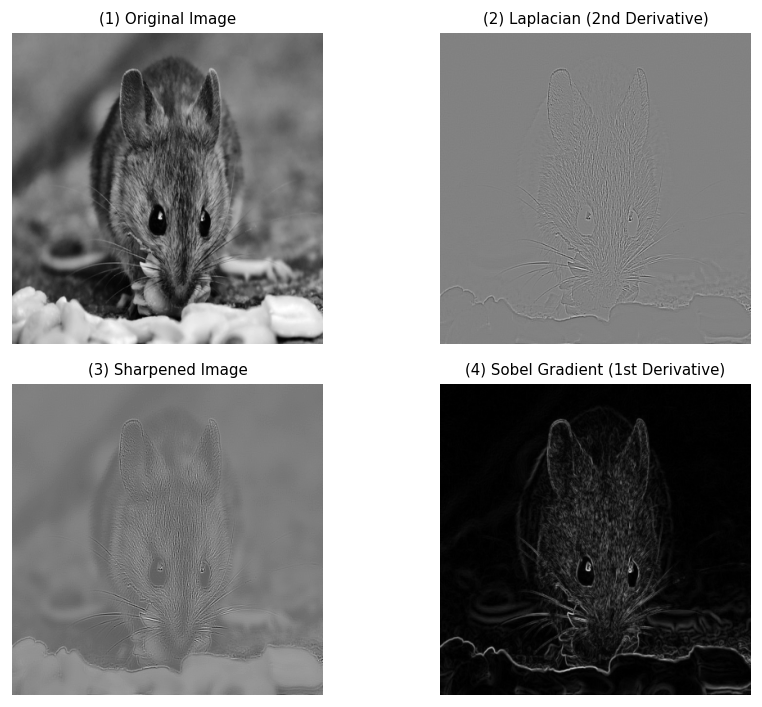

In [2]:
import cv2                      # OpenCV library for image processing
import numpy as np              # NumPy for numerical operations
import matplotlib.pyplot as plt # Matplotlib for displaying images

# Improve output clarity on screen
plt.rcParams['figure.dpi'] = 120


# Step 1: Read input image

image_path = r"C:\Users\Admin\Desktop\B23AI065_CVIP\CVIP\mouse.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

if image is None:
    raise FileNotFoundError("Image not found. Check file path.")

image = image.astype(np.float64)  # Convert to float for derivative operations

# Step 2: Apply Laplacian (Second-order derivative)

laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
# Laplacian highlights fine details and thin edges
# It responds strongly to rapid intensity changes


# Step 3: Sharpen image using Laplacian
# g(x,y) = f(x,y) + ∇²f(x,y)

sharpened_laplacian = image + laplacian
# Adding Laplacian back enhances edges and details


# Step 4: Apply Sobel (First-order derivative)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
# Detects vertical edges (changes along x-direction)

sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
# Detects horizontal edges (changes along y-direction)

# Gradient magnitude combines both directions
sobel_gradient = np.sqrt(sobel_x**2 + sobel_y**2)
# Sobel highlights strong edges but is less sensitive to noise than Laplacian

# Step 5: Normalize images for display

def normalize(img):
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Resize images to fit output window
DISPLAY_SIZE = (380, 380)

def resize(img):
    return cv2.resize(img, DISPLAY_SIZE, interpolation=cv2.INTER_AREA)

# Step 6: Prepare images for display

images = [
    resize(normalize(image)),               # Phase 1
    resize(normalize(laplacian)),            # Phase 2
    resize(normalize(sharpened_laplacian)),  # Phase 3
    resize(normalize(sobel_gradient))        # Phase 4
]

titles = [
    "(1) Original Image",
    "(2) Laplacian (2nd Derivative)",
    "(3) Sharpened Image",
    "(4) Sobel Gradient (1st Derivative)"
]

# Step 7: Display results

plt.figure(figsize=(8, 6))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()
